In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import json
from datetime import datetime

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [4]:
# Load the latest labeled volatility data
vol_file = '../data/processed/volatility/labeled_volatility_data_20250718_165828.csv'
surface_file = '../data/processed/volatility/spx_labeled_vol_surface_20250718_165828.json'
summary_file = '../data/processed/volatility/labeled_volatility_summary_20250718_165828.json'

# Load main volatility dataset
vol_data = pd.read_csv(vol_file)

# Load SPX volatility surface
with open(surface_file, 'r') as f:
    spx_surface = json.load(f)

# Load summary metadata
with open(summary_file, 'r') as f:
    summary = json.load(f)

print(f"✅ Data loaded successfully")
print(f"   Securities: {len(vol_data)}")
print(f"   Columns: {vol_data.columns.tolist()}")
print(f"   Data shape: {vol_data.shape}")

✅ Data loaded successfully
   Securities: 17
   Columns: ['ticker', 'collection_timestamp', 'realized_vol_30d', 'realized_vol_90d', 'realized_vol_120d', 'realized_vol_260d', 'implied_vol_1m_atm', 'implied_vol_3m_atm', 'implied_vol_6m_atm']
   Data shape: (17, 9)


In [5]:
# Display data overview
print("=== VOLATILITY DATA OVERVIEW ===")
print(vol_data.info())
print("\n=== SAMPLE LABELED DATA ===")
display(vol_data.head(10))

print("\n=== SUMMARY STATISTICS ===")
display(vol_data.describe())

=== VOLATILITY DATA OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                17 non-null     object 
 1   collection_timestamp  17 non-null     object 
 2   realized_vol_30d      17 non-null     float64
 3   realized_vol_90d      17 non-null     float64
 4   realized_vol_120d     17 non-null     float64
 5   realized_vol_260d     17 non-null     float64
 6   implied_vol_1m_atm    0 non-null      float64
 7   implied_vol_3m_atm    17 non-null     float64
 8   implied_vol_6m_atm    17 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.3+ KB
None

=== SAMPLE LABELED DATA ===


,ticker,collection_timestamp,realized_vol_30d,realized_vol_90d,realized_vol_120d,realized_vol_260d,implied_vol_1m_atm,implied_vol_3m_atm,implied_vol_6m_atm
0,SPX Index,2025-07-18T16:58:27.219813,9.290350,26.645830,24.550600,19.821670,NaN,14.9244,15.9496
1,SPY US Equity,2025-07-18T16:58:27.219954,9.439339,28.077213,25.685810,20.409135,NaN,14.7446,15.7217
2,AAPL US Equity,2025-07-18T16:58:27.220105,18.065549,43.593139,40.518057,31.846448,NaN,25.9849,26.2443
3,MSFT US Equity,2025-07-18T16:58:27.220201,11.889449,28.775421,29.102204,25.333383,NaN,20.7956,22.0677
4,NVDA US Equity,2025-07-18T16:58:27.220284,25.321683,53.311733,56.521075,57.736954,NaN,39.1903,39.2482
5,AMZN US Equity,2025-07-18T16:58:27.220366,22.203157,40.940910,38.499923,34.562833,NaN,28.5653,29.5698
6,META US Equity,2025-07-18T16:58:27.220456,22.502149,46.475326,43.040256,36.666166,NaN,31.5295,32.2613
7,GOOGL US Equity,2025-07-18T16:58:27.220535,24.449773,36.072942,36.163222,32.102624,NaN,30.3897,30.4124
8,GOOG US Equity,2025-07-18T16:58:27.220617,23.338101,35.860272,35.795158,31.805758,NaN,30.1912,30.2868
9,LLY US Equity,2025-07-18T16:58:27.220697,27.858129,46.820468,43.444138,39.345164,NaN,38.6200,36.5377



=== SUMMARY STATISTICS ===


,realized_vol_30d,realized_vol_90d,realized_vol_120d,realized_vol_260d,implied_vol_1m_atm,implied_vol_3m_atm,implied_vol_6m_atm
count,17.000000,17.000000,17.000000,17.000000,0.0,17.000000,17.000000
mean,20.698236,35.950856,34.519045,30.029617,NaN,26.079335,26.238882
std,6.905469,12.436481,11.565595,10.717087,NaN,9.081610,8.192137
min,9.290350,21.597436,21.529040,19.728298,NaN,14.744600,15.721700
25%,14.607078,26.645830,25.685810,22.595255,NaN,20.795600,21.838300
50%,22.379367,30.118466,29.328013,25.333383,NaN,22.738200,23.106800
75%,25.321683,43.593139,40.518057,34.562833,NaN,30.389700,30.412400
max,32.888180,67.983462,61.014327,57.736954,NaN,46.172700,42.830300


Securities with both realized 30D and implied 3M data: 17


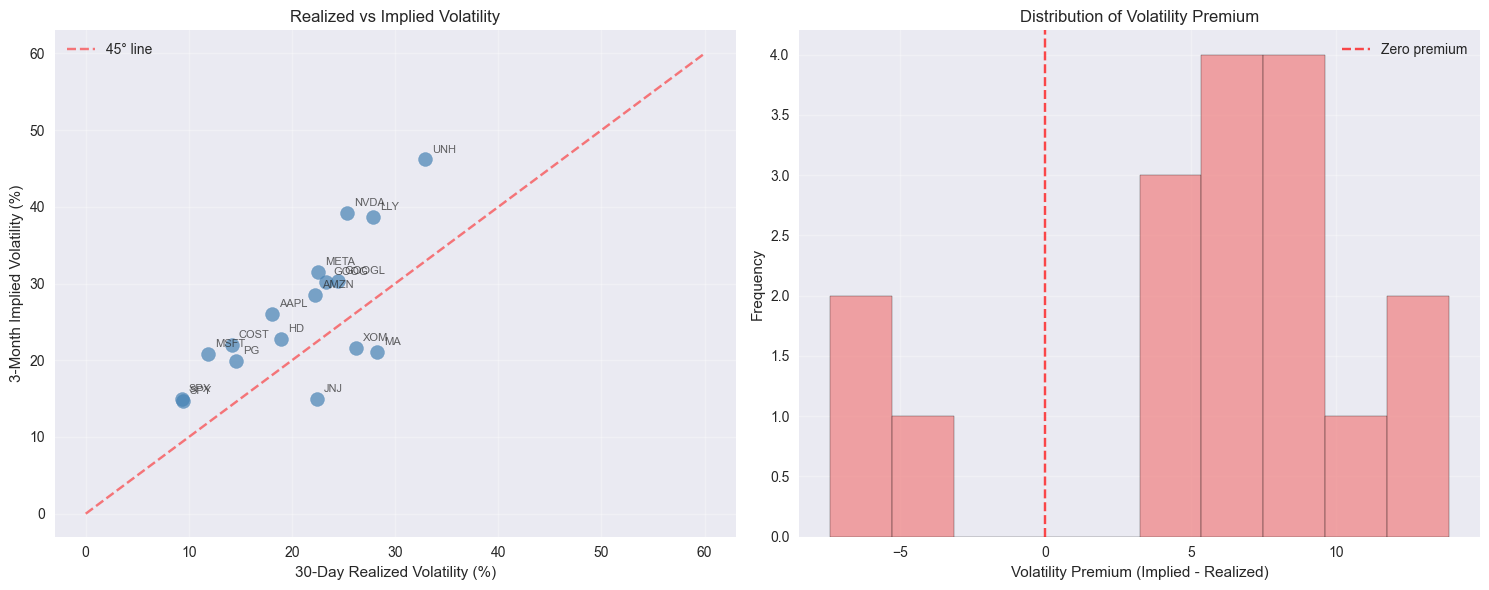

Average volatility premium: 5.38%
Median volatility premium: 6.36%


In [6]:
# Realized vs Implied Volatility Analysis
comparison_data = vol_data[['ticker', 'realized_vol_30d', 'implied_vol_3m_atm']].copy()
comparison_data = comparison_data.dropna()

print(f"Securities with both realized 30D and implied 3M data: {len(comparison_data)}")

# Create scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Realized vs Implied
ax1.scatter(comparison_data['realized_vol_30d'], comparison_data['implied_vol_3m_atm'], 
           alpha=0.7, s=100, c='steelblue')
ax1.plot([0, 60], [0, 60], 'r--', alpha=0.5, label='45° line')
ax1.set_xlabel('30-Day Realized Volatility (%)')
ax1.set_ylabel('3-Month Implied Volatility (%)')
ax1.set_title('Realized vs Implied Volatility')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add ticker labels
for i, row in comparison_data.iterrows():
    ax1.annotate(row['ticker'].replace(' US Equity', '').replace(' Index', ''), 
                (row['realized_vol_30d'], row['implied_vol_3m_atm']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

# Volatility premium histogram
vol_premium = comparison_data['implied_vol_3m_atm'] - comparison_data['realized_vol_30d']
ax2.hist(vol_premium, bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(0, color='red', linestyle='--', alpha=0.7, label='Zero premium')
ax2.set_xlabel('Volatility Premium (Implied - Realized)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Volatility Premium')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average volatility premium: {vol_premium.mean():.2f}%")
print(f"Median volatility premium: {vol_premium.median():.2f}%")

=== SPX VOLATILITY SURFACE ===
Term Structure (ATM): {'3M': 14.9244, '6M': 15.9496, '12M': 16.6305}
Vol Skew (3M): {'90%': 22.1647, '95%': 18.6675, '100%': 14.9244, '105%': 12.1124, '110%': 11.1861}


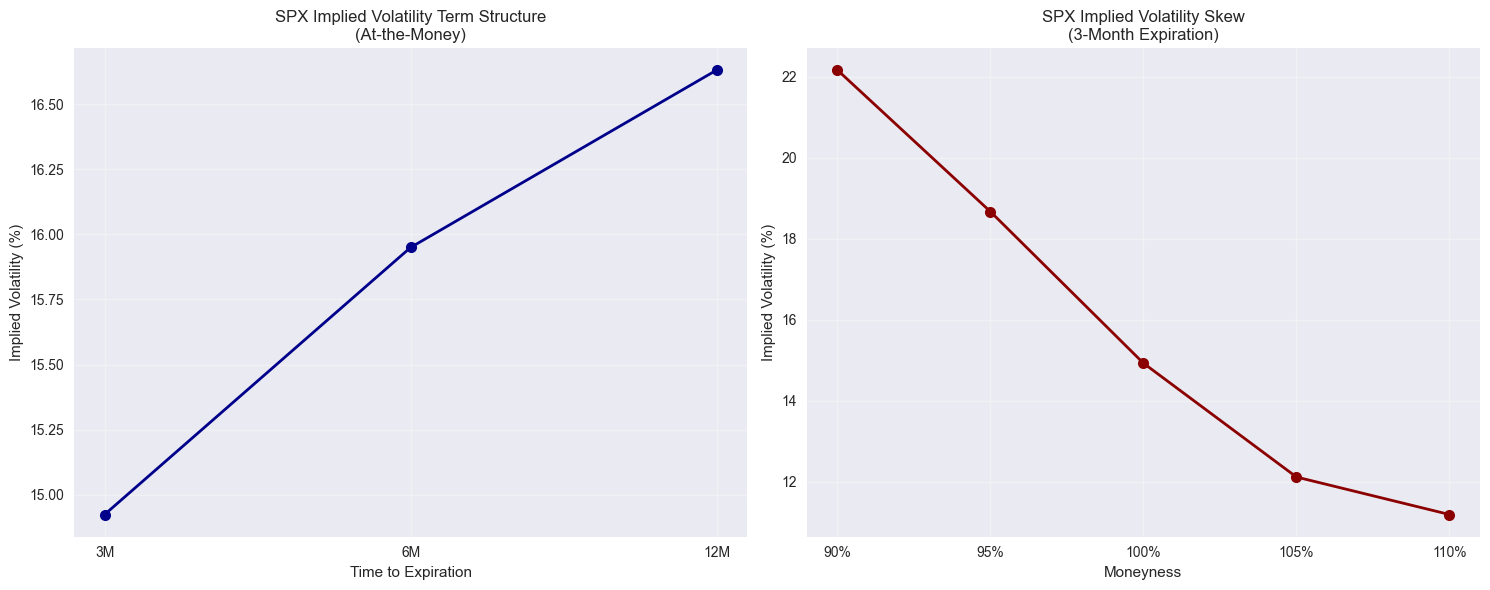


Put skew (90% - 100%): 7.24%
Call skew (100% - 110%): 3.74%


In [7]:
# Extract SPX volatility surface data
surface_data = spx_surface['volatility_surface_labeled']

# Term structure and skew data
term_structure = {
    '3M': surface_data.get('implied_vol_3m_atm'),
    '6M': surface_data.get('implied_vol_6m_atm'), 
    '12M': surface_data.get('implied_vol_12m_atm')
}

vol_skew = {
    '90%': surface_data.get('implied_vol_3m_90_moneyness'),
    '95%': surface_data.get('implied_vol_3m_95_moneyness'),
    '100%': surface_data.get('implied_vol_3m_100_moneyness'),
    '105%': surface_data.get('implied_vol_3m_105_moneyness'),
    '110%': surface_data.get('implied_vol_3m_110_moneyness')
}

print("=== SPX VOLATILITY SURFACE ===")
print(f"Term Structure (ATM): {term_structure}")
print(f"Vol Skew (3M): {vol_skew}")

# Plot the surface
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Term structure plot
terms = list(term_structure.keys())
term_vols = [v for v in term_structure.values() if v is not None]
ax1.plot(terms, term_vols, 'o-', linewidth=2, markersize=8, color='darkblue')
ax1.set_xlabel('Time to Expiration')
ax1.set_ylabel('Implied Volatility (%)')
ax1.set_title('SPX Implied Volatility Term Structure\n(At-the-Money)')
ax1.grid(True, alpha=0.3)

# Volatility skew plot
strikes = list(vol_skew.keys())
skew_vols = [v for v in vol_skew.values() if v is not None]
ax2.plot(strikes, skew_vols, 'o-', linewidth=2, markersize=8, color='darkred')
ax2.set_xlabel('Moneyness')
ax2.set_ylabel('Implied Volatility (%)')
ax2.set_title('SPX Implied Volatility Skew\n(3-Month Expiration)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate skew metrics
put_skew = vol_skew['90%'] - vol_skew['100%']
call_skew = vol_skew['100%'] - vol_skew['110%']
print(f"\nPut skew (90% - 100%): {put_skew:.2f}%")
print(f"Call skew (100% - 110%): {call_skew:.2f}%")

In [8]:
# More appropriate volatility comparisons
vol_comparisons = vol_data[['ticker', 'realized_vol_30d', 'realized_vol_90d', 
                           'implied_vol_1m_atm', 'implied_vol_3m_atm']].copy()

# Create matched comparisons
vol_comparisons['vol_premium_1m'] = vol_comparisons['implied_vol_1m_atm'] - vol_comparisons['realized_vol_30d']
vol_comparisons['vol_premium_3m'] = vol_comparisons['implied_vol_3m_atm'] - vol_comparisons['realized_vol_90d']

print("=== MATCHED VOLATILITY COMPARISONS ===")
print("30D Realized vs 1M Implied (roughly matched)")
print("90D Realized vs 3M Implied (well matched)")

=== MATCHED VOLATILITY COMPARISONS ===
30D Realized vs 1M Implied (roughly matched)
90D Realized vs 3M Implied (well matched)


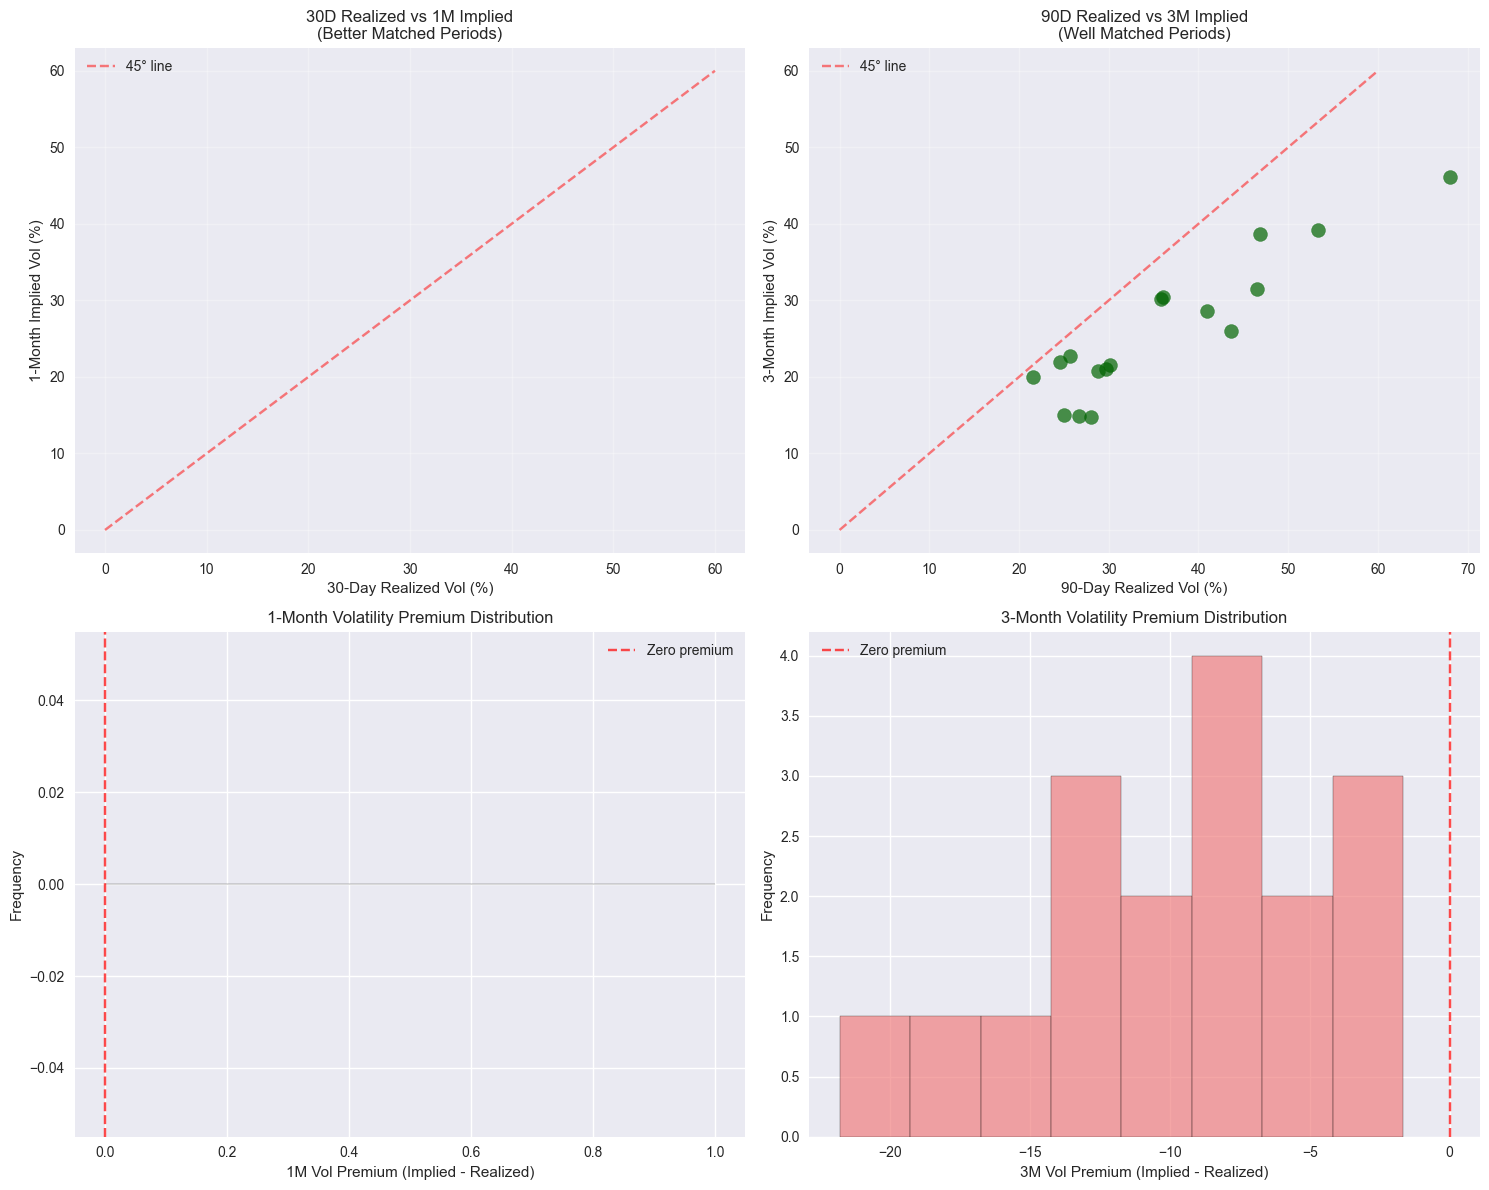

1M Vol Premium (30D realized vs 1M implied): nan%
3M Vol Premium (90D realized vs 3M implied): -9.87%


In [9]:
# Better volatility analysis with matched periods
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 30D Realized vs 1M Implied (better matched)
ax1 = axes[0,0]
comparison_1m = vol_data[['ticker', 'realized_vol_30d', 'implied_vol_1m_atm']].dropna()
ax1.scatter(comparison_1m['realized_vol_30d'], comparison_1m['implied_vol_1m_atm'], 
           alpha=0.7, s=100, c='steelblue')
ax1.plot([0, 60], [0, 60], 'r--', alpha=0.5, label='45° line')
ax1.set_xlabel('30-Day Realized Vol (%)')
ax1.set_ylabel('1-Month Implied Vol (%)')
ax1.set_title('30D Realized vs 1M Implied\n(Better Matched Periods)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 90D Realized vs 3M Implied (well matched)
ax2 = axes[0,1]
comparison_3m = vol_data[['ticker', 'realized_vol_90d', 'implied_vol_3m_atm']].dropna()
ax2.scatter(comparison_3m['realized_vol_90d'], comparison_3m['implied_vol_3m_atm'], 
           alpha=0.7, s=100, c='darkgreen')
ax2.plot([0, 60], [0, 60], 'r--', alpha=0.5, label='45° line')
ax2.set_xlabel('90-Day Realized Vol (%)')
ax2.set_ylabel('3-Month Implied Vol (%)')
ax2.set_title('90D Realized vs 3M Implied\n(Well Matched Periods)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. 1M Vol Premium Distribution
ax3 = axes[1,0]
vol_premium_1m = comparison_1m['implied_vol_1m_atm'] - comparison_1m['realized_vol_30d']
ax3.hist(vol_premium_1m, bins=8, alpha=0.7, color='lightblue', edgecolor='black')
ax3.axvline(0, color='red', linestyle='--', alpha=0.7, label='Zero premium')
ax3.set_xlabel('1M Vol Premium (Implied - Realized)')
ax3.set_ylabel('Frequency')
ax3.set_title('1-Month Volatility Premium Distribution')
ax3.legend()

# 4. 3M Vol Premium Distribution  
ax4 = axes[1,1]
vol_premium_3m = comparison_3m['implied_vol_3m_atm'] - comparison_3m['realized_vol_90d']
ax4.hist(vol_premium_3m, bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
ax4.axvline(0, color='red', linestyle='--', alpha=0.7, label='Zero premium')
ax4.set_xlabel('3M Vol Premium (Implied - Realized)')
ax4.set_ylabel('Frequency')
ax4.set_title('3-Month Volatility Premium Distribution')
ax4.legend()

plt.tight_layout()
plt.show()

print(f"1M Vol Premium (30D realized vs 1M implied): {vol_premium_1m.mean():.2f}%")
print(f"3M Vol Premium (90D realized vs 3M implied): {vol_premium_3m.mean():.2f}%")

In [10]:
# More precise matching
trading_days_per_month = 21
trading_days_3m = 63  # More precise than 60

print(f"30 calendar days ≈ {30 * 5/7:.0f} trading days")
print(f"90 calendar days ≈ {90 * 5/7:.0f} trading days") 
print(f"3M options ≈ 63 trading days")

30 calendar days ≈ 21 trading days
90 calendar days ≈ 64 trading days
3M options ≈ 63 trading days
